# 資料前處理

In [1]:
import numpy as np
import pandas as pd

def load_csv_data(file):
    return pd.read_csv(file)

wine = load_csv_data("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


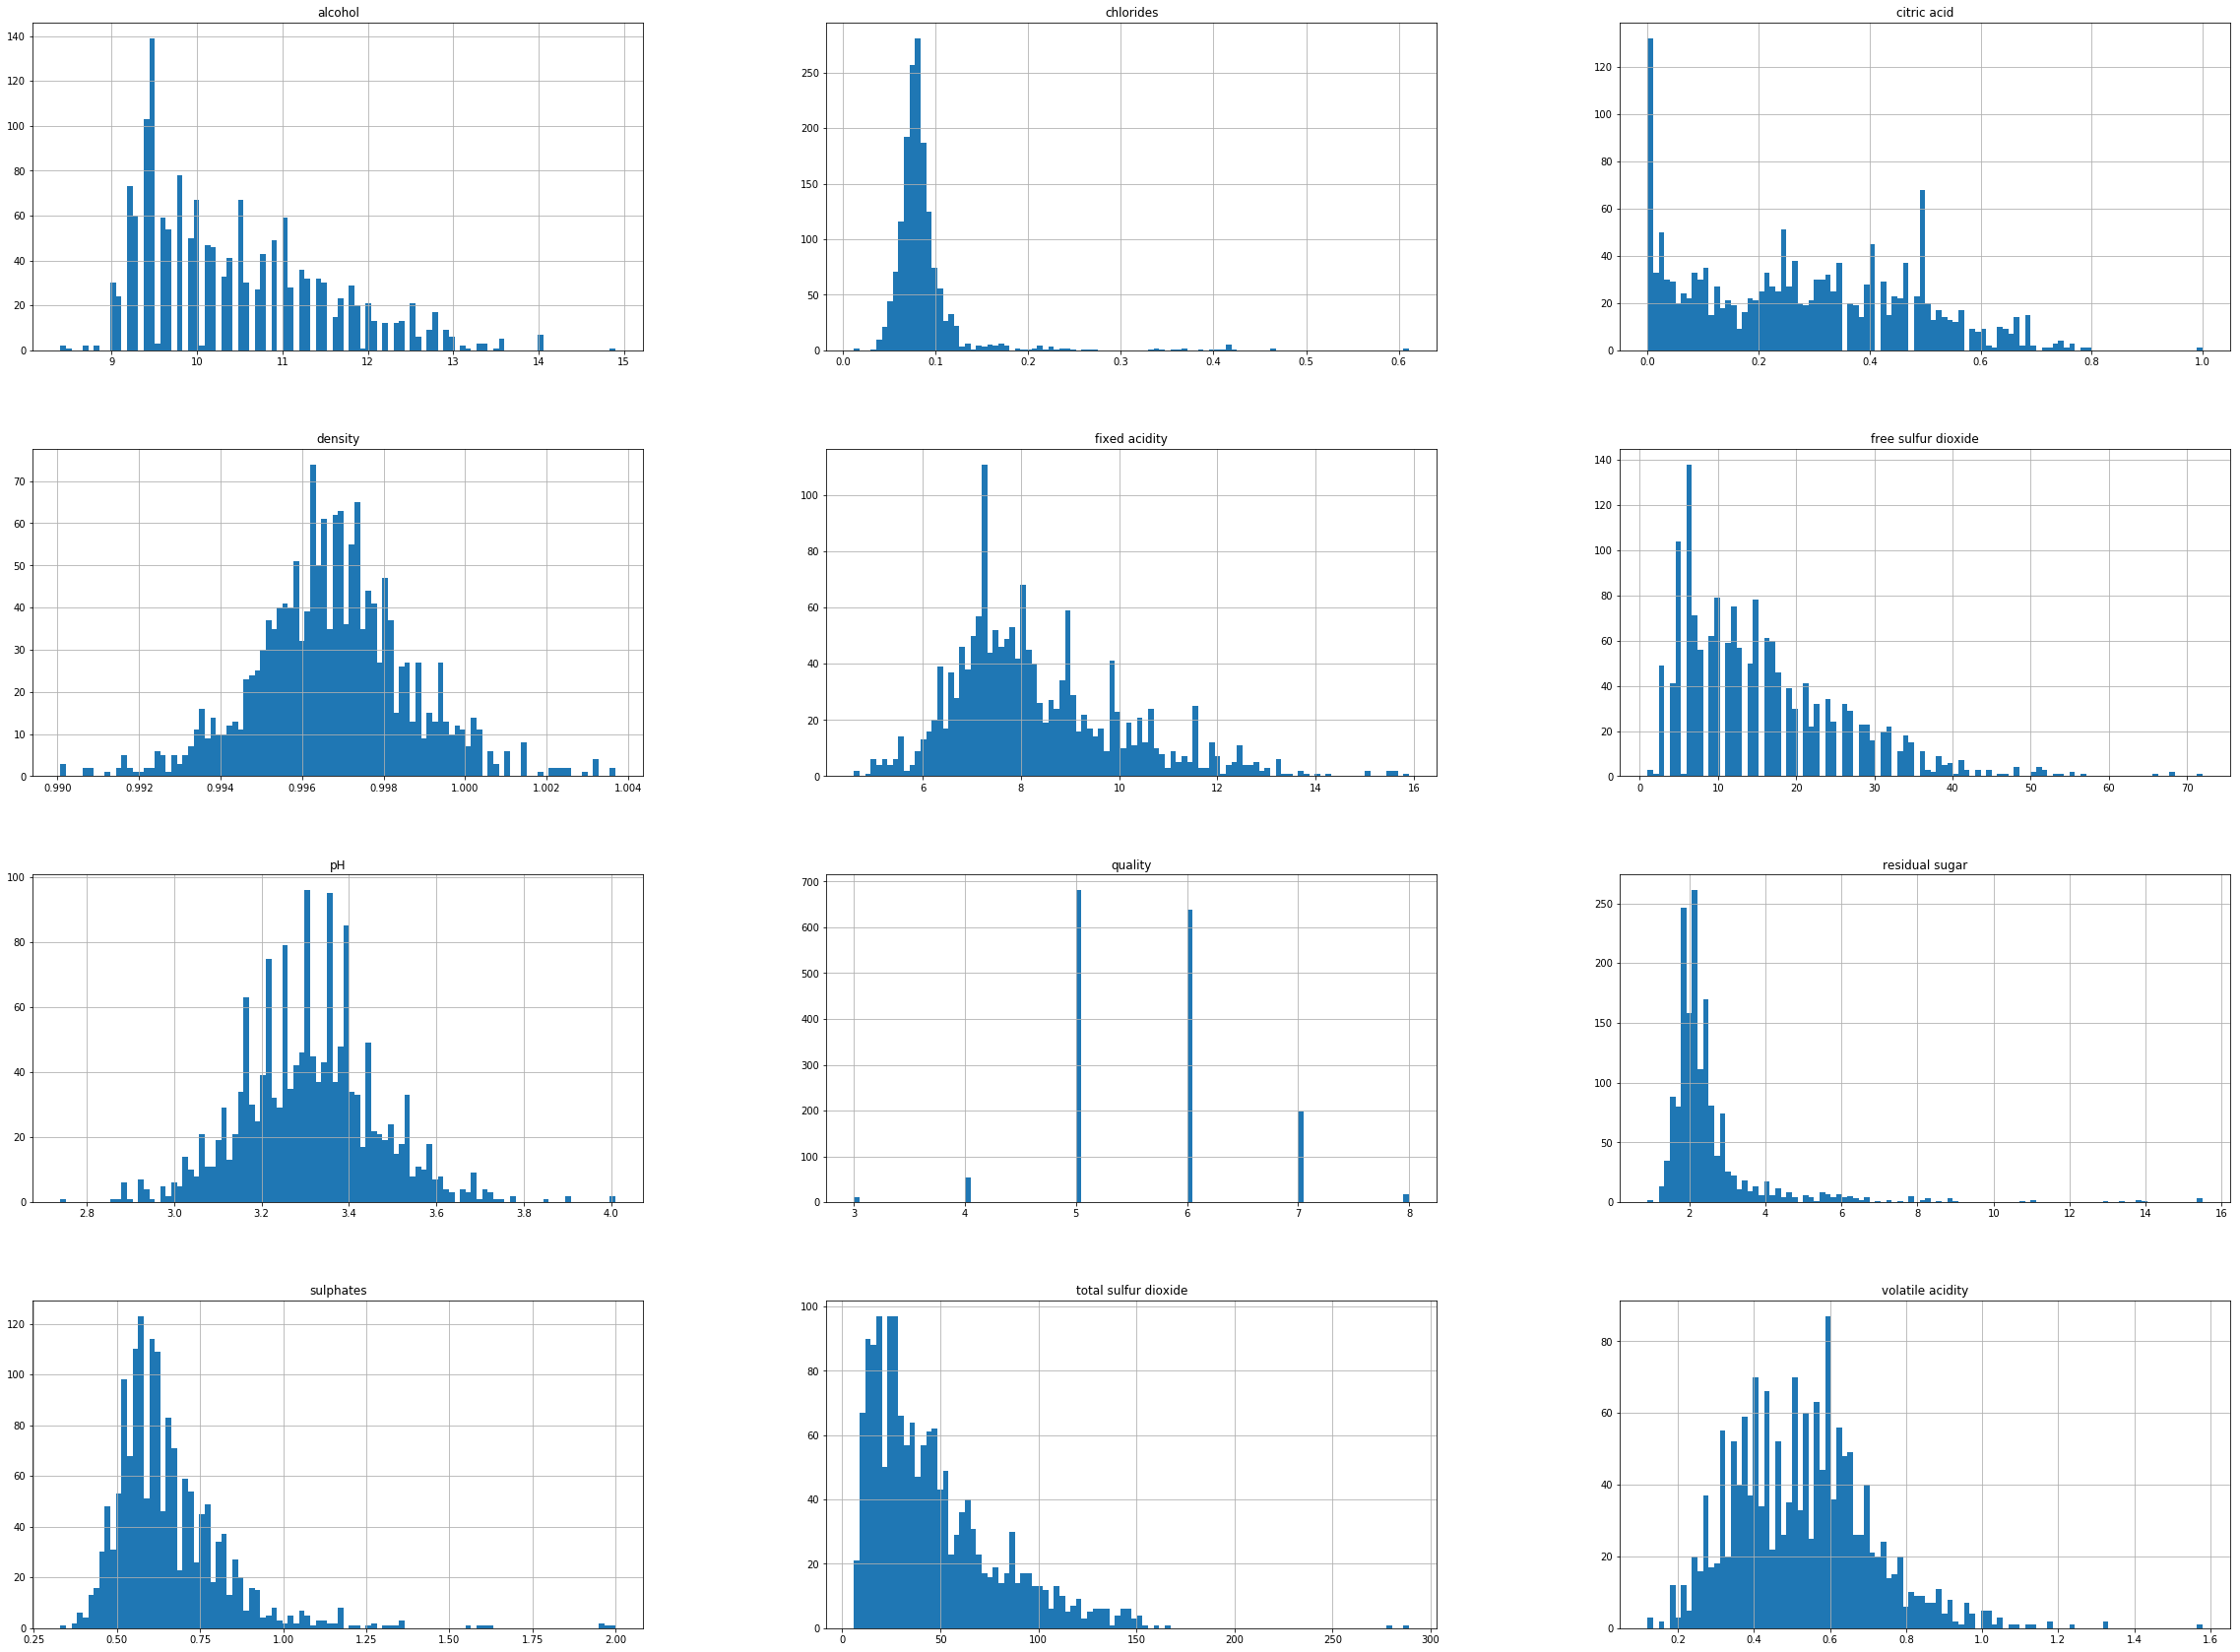

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
wine.hist(bins=100, figsize=(40,30))
plt.savefig("attribute_histogram_plots")
plt.show()

In [5]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [6]:
train_set, test_set = split_train_test(wine, 0.2)
print(len(train_set), "train +", len(test_set), "test")

1280 train + 319 test


In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(wine, test_size=0.2, random_state=42)

In [8]:
test_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6


In [9]:
wine= train_set.copy()

In [10]:
corr_matrix = wine.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.472676
sulphates               0.242596
citric acid             0.216115
fixed acidity           0.122488
residual sugar          0.005425
pH                     -0.045185
free sulfur dioxide    -0.055860
chlorides              -0.126541
density                -0.167091
total sulfur dioxide   -0.200067
volatile acidity       -0.378372
Name: quality, dtype: float64

In [11]:
wine["sulfur_ratio"] = wine["free sulfur dioxide"]/wine["total sulfur dioxide"]
wine['acidity_ratio'] = wine["fixed acidity"]/wine["volatile acidity"]
wine["c"] = wine["pH"]/wine["alcohol"]
wine["sulphates_volatile acidity_ratio"] = wine["sulphates"]/wine["volatile acidity"]
wine["citric acid_chlorides_ratio"] = wine["citric acid"]/wine["chlorides"]
wine["alcohol_chlorides_ratio"] = wine["alcohol"]/wine["chlorides"]

In [12]:
corr_matrix = wine.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                             1.000000
alcohol                             0.472676
sulphates_volatile acidity_ratio    0.382378
acidity_ratio                       0.336420
citric acid_chlorides_ratio         0.286235
alcohol_chlorides_ratio             0.274968
sulphates                           0.242596
citric acid                         0.216115
sulfur_ratio                        0.202364
fixed acidity                       0.122488
residual sugar                      0.005425
pH                                 -0.045185
free sulfur dioxide                -0.055860
chlorides                          -0.126541
density                            -0.167091
total sulfur dioxide               -0.200067
volatile acidity                   -0.378372
c                                  -0.486091
Name: quality, dtype: float64

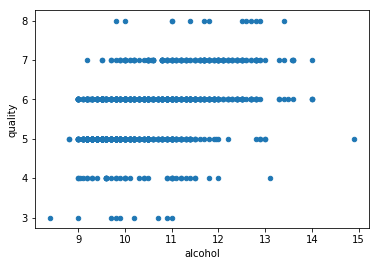

In [13]:

from pandas.plotting import scatter_matrix
wine.plot(kind="scatter", x="alcohol", y="quality")
plt.show()


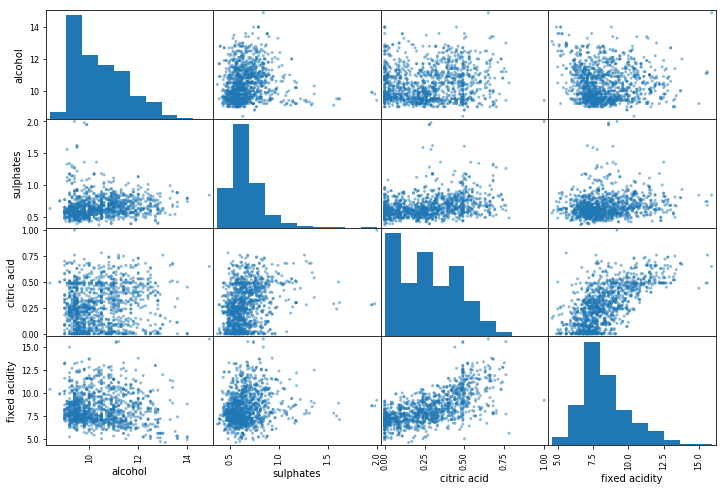

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["alcohol", "sulphates", "citric acid", "fixed acidity"]
scatter_matrix(wine[attributes], figsize=(12, 8))
plt.savefig("scatter_matrix_plot")

In [15]:
wine = train_set.drop("quality", axis=1) # drop labels for training set
wine_labels = train_set["quality"].copy()

In [16]:
sample_incomplete_rows = wine[wine.isnull().any(axis=1)].head()
sample_incomplete_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol


In [17]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

In [18]:
imputer.fit(wine)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [19]:
X = imputer.transform(wine)
wine_tr = pd.DataFrame(X, columns=wine.columns,
                          index = list(wine.index.values))

In [20]:
wine_tr.loc[sample_incomplete_rows.index.values]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol


In [21]:
wine_tr = pd.DataFrame(X, columns=wine.columns)
wine_tr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
1,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
2,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
3,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
4,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
fixed_acidity_ix, volatile_acidity_ix, citric_acid_ix, chlorides_ix, sulphates_ix = 0, 1, 2, 4, 9 

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_citric_acid_chlorides_ratio = True): # no *args or **kargs
        self.add_citric_acid_chlorides_ratio = add_citric_acid_chlorides_ratio
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        acidity_ratio = X[:, fixed_acidity_ix] / X[:, volatile_acidity_ix]
        sulphates_volatile_acidity_ratio = X[:, sulphates_ix] / X[:, volatile_acidity_ix]
        if self.add_citric_acid_chlorides_ratio:
            citric_acid_chlorides_ratio = X[:, citric_acid_ix] / X[:, chlorides_ix]
            return np.c_[X, acidity_ratio, sulphates_volatile_acidity_ratio,
                         citric_acid_chlorides_ratio]
        else:
            return np.c_[X, acidity_ratio, sulphates_volatile_acidity_ratio]

attr_adder = CombinedAttributesAdder(add_citric_acid_chlorides_ratio=False)
wine_extra_attribs = attr_adder.transform(wine.values)

In [23]:
wine_extra_attribs = pd.DataFrame(
    wine_extra_attribs,
    columns=list(wine.columns)+["acidity_ratio", "sulphates_volatile_acidity_ratio"])
wine_extra_attribs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,acidity_ratio,sulphates_volatile_acidity_ratio
0,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,12.608696,1.072464
1,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,29.047619,2.809524
2,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,27.948718,1.923077
3,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,12.846715,0.686131
4,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,8.115942,0.473430


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

wine_tr = num_pipeline.fit_transform(wine)

In [25]:
wine_tr

array([[ 0.21833164,  0.88971201,  0.19209222, ..., -0.60592788,
        -0.47669384,  0.08693868],
       [-1.29016623, -1.78878251,  0.65275338, ...,  1.21726382,
         1.77377737,  1.00582301],
       [ 1.49475291, -0.78434707,  1.01104539, ...,  1.095388  ,
         0.62532933,  0.2285152 ],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ..., -0.71636823,
        -0.7377447 , -0.97018322],
       [-0.24582155, -1.84458448,  0.39683051, ...,  2.37650605,
         3.31611462,  1.16329163],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.21381953,
         0.54628966,  0.28236718]])

In [26]:
num_attribs = list(wine)
wine_prepared = num_pipeline.fit_transform(wine)

In [27]:
wine_prepared.shape

(1279, 14)

# LinearRegression

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_prepared, wine_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# let's try the full preprocessing pipeline on a few training instances
some_data = wine.iloc[:5]
some_labels = wine_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [5.70248099 6.04222528 5.67103903 5.10814467 4.80454583]
Labels: [6, 6, 6, 5, 5]


In [30]:
from sklearn.metrics import mean_squared_error

wine_predictions = lin_reg.predict(wine_prepared)
lin_mse = mean_squared_error(wine_labels, wine_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6510118225404404

In [31]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(wine_labels, wine_predictions)
lin_mae

0.49947401745314934

In [32]:
final_model = lin_reg

X_test = test_set.drop('quality', axis=1)
y_test = test_set["quality"].copy()

X_test_prepared = num_pipeline.fit_transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [33]:
list(final_predictions)

[5.32847131074084,
 5.009967215890899,
 5.692237012518404,
 5.430052549745229,
 5.684720850414981,
 5.239700166278108,
 4.9929013873048005,
 5.075854150418404,
 5.775938751879945,
 5.660676688001479,
 6.0499065238042,
 5.220010090064304,
 5.536057938034307,
 5.239486045396049,
 5.418125590375036,
 6.4060297610814825,
 5.106612852516519,
 5.556736197537179,
 6.545251184134777,
 5.326875264522981,
 5.322110345024055,
 5.184725420299529,
 5.88328741032261,
 6.289228885700259,
 5.333648809712188,
 5.436107213305853,
 6.3546565863252376,
 5.307621981404296,
 5.177122399610905,
 6.167213351495847,
 5.2190071576048185,
 5.44698053905181,
 5.756053736925944,
 5.391759625267207,
 5.4514492689468295,
 4.988661135419314,
 6.1632500510102926,
 5.684531956511396,
 5.627805885587686,
 6.12707258954906,
 5.543169510485551,
 5.212875007460402,
 6.205775098780847,
 5.143057151591252,
 5.851956640359448,
 5.836669340402168,
 6.4493083832539755,
 5.636746653070387,
 5.116881071249294,
 5.526163581224784,

In [34]:
Y_test=np.array(y_test)
list(y_test)

[6,
 5,
 6,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 7,
 3,
 5,
 5,
 6,
 7,
 5,
 7,
 8,
 5,
 5,
 6,
 5,
 6,
 6,
 6,
 7,
 6,
 5,
 6,
 5,
 5,
 6,
 5,
 6,
 5,
 7,
 5,
 4,
 6,
 5,
 5,
 7,
 5,
 5,
 6,
 7,
 6,
 5,
 6,
 5,
 5,
 5,
 7,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 7,
 5,
 6,
 6,
 5,
 6,
 5,
 6,
 5,
 6,
 4,
 6,
 6,
 6,
 5,
 8,
 5,
 6,
 6,
 5,
 6,
 5,
 6,
 6,
 7,
 5,
 6,
 7,
 4,
 7,
 6,
 5,
 5,
 5,
 6,
 5,
 6,
 5,
 6,
 5,
 5,
 5,
 7,
 6,
 7,
 6,
 5,
 6,
 5,
 8,
 5,
 6,
 5,
 6,
 7,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 6,
 5,
 5,
 6,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 7,
 6,
 8,
 5,
 5,
 5,
 6,
 6,
 6,
 5,
 6,
 7,
 6,
 5,
 6,
 5,
 5,
 6,
 6,
 6,
 7,
 5,
 7,
 5,
 5,
 5,
 6,
 6,
 5,
 5,
 6,
 5,
 7,
 6,
 7,
 6,
 6,
 5,
 5,
 6,
 4,
 6,
 5,
 7,
 5,
 5,
 4,
 5,
 7,
 6,
 5,
 6,
 6,
 7,
 6,
 5,
 5,
 6,
 5,
 7,
 5,
 6,
 6,
 5,
 7,
 5,
 5,
 5,
 6,
 7,
 7,
 5,
 5,
 6,
 6,
 7,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 4,
 5,
 5,
 7,
 5,
 5,
 5,
 5,
 6,
 6,
 5,
 7,
 5,
 6,
 6,
 6,
 5,
 4,
 6,
 7,
 6,
 7,
 5,
 6,
 6,
 5,


In [35]:
final_rmse

0.6231238739209931

## LinearRegression做交叉驗證

In [36]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

lin_scores = cross_val_score(lin_reg, wine_prepared, wine_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.62960105 0.71841434 0.69363621 0.70150314 0.68016265 0.67488408
 0.66711484 0.68068173 0.4986116  0.64727016]
Mean: 0.659187980463089
Standard deviation: 0.05873527951600096


## LinearRegression做gridsearchCV

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid =  { 'fit_intercept' : [True,False] ,'normalize' :[ True,False]}
grid_search = GridSearchCV(lin_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(wine_prepared, wine_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [38]:
grid_search.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [39]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.6643025610657023 {'fit_intercept': True, 'normalize': True}
0.6643025610657023 {'fit_intercept': True, 'normalize': False}
5.7301986610454705 {'fit_intercept': False, 'normalize': True}
5.7301986610454705 {'fit_intercept': False, 'normalize': False}


In [40]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002129,0.000252,0.000417,0.000100,True,True,"{'fit_intercept': True, 'normalize': True}",-0.463220,-0.485396,-0.465012,...,-0.441298,0.053392,1,-0.417006,-0.410204,-0.416245,-0.418880,-0.447183,-0.421904,0.012970
1,0.001774,0.000173,0.000404,0.000043,True,False,"{'fit_intercept': True, 'normalize': False}",-0.463220,-0.485396,-0.465012,...,-0.441298,0.053392,1,-0.417006,-0.410204,-0.416245,-0.418880,-0.447183,-0.421904,0.012970
2,0.001432,0.000157,0.000365,0.000052,False,True,"{'fit_intercept': False, 'normalize': True}",-32.912122,-32.330829,-33.727540,...,-32.835177,0.483105,3,-31.996407,-32.071115,-31.717744,-32.012497,-32.037707,-31.967094,0.127203
3,0.001392,0.000241,0.000364,0.000077,False,False,"{'fit_intercept': False, 'normalize': False}",-32.912122,-32.330829,-33.727540,...,-32.835177,0.483105,3,-31.996407,-32.071115,-31.717744,-32.012497,-32.037707,-31.967094,0.127203


In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
lin_reg.fit(wine_prepared, wine_labels)
wine_predictions = lin_reg.predict(wine_prepared)
lin_mse = mean_squared_error(wine_labels, wine_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6510118225404404

In [42]:
final_model = grid_search.best_estimator_

X_test = test_set.drop('quality', axis=1)
y_test = test_set["quality"].copy()

X_test_prepared = num_pipeline.fit_transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [43]:
final_predictions

array([5.32847131, 5.00996722, 5.69223701, 5.43005255, 5.68472085,
       5.23970017, 4.99290139, 5.07585415, 5.77593875, 5.66067669,
       6.04990652, 5.22001009, 5.53605794, 5.23948605, 5.41812559,
       6.40602976, 5.10661285, 5.5567362 , 6.54525118, 5.32687526,
       5.32211035, 5.18472542, 5.88328741, 6.28922889, 5.33364881,
       5.43610721, 6.35465659, 5.30762198, 5.1771224 , 6.16721335,
       5.21900716, 5.44698054, 5.75605374, 5.39175963, 5.45144927,
       4.98866114, 6.16325005, 5.68453196, 5.62780589, 6.12707259,
       5.54316951, 5.21287501, 6.2057751 , 5.14305715, 5.85195664,
       5.83666934, 6.44930838, 5.63674665, 5.11688107, 5.52616358,
       5.20132329, 5.04784888, 5.53915679, 6.31006995, 4.93988594,
       4.96381788, 5.99675206, 5.38908488, 5.79021138, 5.24083139,
       5.57771606, 5.93032765, 5.24207949, 5.28282488, 6.43851765,
       5.38827815, 6.29335715, 5.27667348, 6.45026079, 5.29709479,
       6.34964133, 4.7203089 , 5.80460326, 5.76818275, 6.12141

In [44]:
final_rmse

0.6231238739209932

# DecisionTree

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(wine_prepared, wine_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [46]:
wine_predictions = tree_reg.predict(wine_prepared)
tree_mse = mean_squared_error(wine_labels, wine_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, wine_prepared, wine_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [48]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.87052427 0.95197164 0.81967982 0.81009259 0.77055175 0.81967982
 0.73950997 0.78561282 0.66143783 0.75294697]
Mean: 0.7982007459247524
Standard deviation: 0.07420230852874878


# RandomForest

In [49]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(wine_prepared, wine_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [50]:
wine_predictions = forest_reg.predict(wine_prepared)
forest_mse = mean_squared_error(wine_labels, wine_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.24371698168540737

## RandomForest做交叉驗證

In [51]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, wine_prepared, wine_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.64086124 0.69619502 0.63854082 0.58229073 0.62998016 0.65293807
 0.553328   0.70055781 0.47145055 0.59167452]
Mean: 0.6157816923648732
Standard deviation: 0.06543484441794419


## RandomForest做gridsearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30,], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(wine_prepared, wine_labels)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [53]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [54]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.7192574284434768 {'max_features': 2, 'n_estimators': 3}
0.6373260697285106 {'max_features': 2, 'n_estimators': 10}
0.6226427181605234 {'max_features': 2, 'n_estimators': 30}
0.6674480695525865 {'max_features': 4, 'n_estimators': 3}
0.6147839809533946 {'max_features': 4, 'n_estimators': 10}
0.6094262872716905 {'max_features': 4, 'n_estimators': 30}
0.7007820445006676 {'max_features': 6, 'n_estimators': 3}
0.6337460762262236 {'max_features': 6, 'n_estimators': 10}
0.6147218026250044 {'max_features': 6, 'n_estimators': 30}
0.7081809690642888 {'max_features': 8, 'n_estimators': 3}
0.6247376306217943 {'max_features': 8, 'n_estimators': 10}
0.6072184724658798 {'max_features': 8, 'n_estimators': 30}
0.6895978036105577 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.6293511557531692 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.6755982364928798 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.6212235398580833 {'bootstrap': False, 'max_features': 3, 'n

In [55]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008979,0.002147,0.001026,0.000207,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.566840,-0.516493,...,-0.517331,0.062119,18,-0.117411,-0.125448,-0.133485,-0.117411,-0.133247,-0.125400,0.007136
1,0.021150,0.002317,0.001163,0.000028,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.445352,-0.420586,...,-0.406185,0.048165,11,-0.065396,-0.071496,-0.067791,-0.068553,-0.072129,-0.069073,0.002476
2,0.058908,0.003693,0.002653,0.000122,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.420825,-0.411680,...,-0.387684,0.041352,6,-0.051979,-0.056418,-0.054275,-0.055868,-0.059890,-0.055686,0.002607
3,0.008389,0.000127,0.000636,0.000021,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.505208,-0.462240,...,-0.445487,0.057640,12,-0.119040,-0.127512,-0.119257,-0.121972,-0.121094,-0.121775,0.003074
4,0.027592,0.001909,0.001149,0.000009,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.428398,-0.402109,...,-0.377959,0.052816,4,-0.060264,-0.070792,-0.061935,-0.066588,-0.067305,-0.065377,0.003808
5,0.080598,0.003123,0.002563,0.000103,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.410417,-0.374527,...,-0.371400,0.044758,2,-0.051130,-0.055784,-0.050452,-0.057191,-0.058362,-0.054584,0.003210
6,0.011468,0.001575,0.000670,0.000077,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.576823,-0.459635,...,-0.491095,0.050232,16,-0.118388,-0.121212,-0.115021,-0.124905,-0.117513,-0.119408,0.003387
7,0.035065,0.001001,0.001189,0.000045,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.436172,-0.390977,...,-0.401634,0.045772,10,-0.062757,-0.066227,-0.063421,-0.067488,-0.068936,-0.065766,0.002357
8,0.100405,0.002612,0.002534,0.000067,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.431701,-0.379718,...,-0.377883,0.047969,3,-0.052250,-0.055909,-0.051840,-0.055312,-0.059008,-0.054864,0.002625
9,0.012747,0.000487,0.000701,0.000129,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.521267,-0.574653,...,-0.501520,0.068748,17,-0.113392,-0.115781,-0.125991,-0.128706,-0.126411,-0.122056,0.006215


In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(wine_prepared, wine_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10bf34080>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10bf34d30>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [57]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.6054734187328893 {'max_features': 7, 'n_estimators': 180}
0.6277900975386845 {'max_features': 5, 'n_estimators': 15}
0.6076164332447985 {'max_features': 3, 'n_estimators': 72}
0.6202321647942849 {'max_features': 5, 'n_estimators': 21}
0.6076851682981098 {'max_features': 7, 'n_estimators': 122}
0.6077832990591611 {'max_features': 3, 'n_estimators': 75}
0.6064669116293432 {'max_features': 3, 'n_estimators': 88}
0.6072988426504675 {'max_features': 5, 'n_estimators': 100}
0.6059648485016834 {'max_features': 3, 'n_estimators': 150}
0.7612846637937741 {'max_features': 5, 'n_estimators': 2}


In [58]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.04223563, 0.05260648, 0.03436908, 0.04716125, 0.04664683,
       0.04268012, 0.07202442, 0.04778446, 0.04900452, 0.11783508,
       0.23921714, 0.07050886, 0.08977705, 0.04814909])

In [59]:
final_model = grid_search.best_estimator_

X_test = test_set.drop('quality', axis=1)
y_test = test_set["quality"].copy()

X_test_prepared = num_pipeline.fit_transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [60]:
final_predictions

array([5.3       , 5.13333333, 5.63333333, 5.13333333, 5.96666667,
       5.1       , 5.1       , 4.5       , 6.        , 5.96666667,
       6.53333333, 5.23333333, 5.63333333, 5.1       , 5.36666667,
       6.43333333, 5.33333333, 5.7       , 6.6       , 5.03333333,
       4.86666667, 5.5       , 5.33333333, 6.        , 5.56666667,
       5.83333333, 6.43333333, 5.4       , 5.1       , 6.16666667,
       5.23333333, 5.36666667, 5.73333333, 5.46666667, 5.63333333,
       5.13333333, 6.26666667, 6.16666667, 5.26666667, 5.56666667,
       5.2       , 5.23333333, 6.36666667, 5.1       , 5.63333333,
       5.56666667, 6.6       , 5.43333333, 5.23333333, 5.63333333,
       5.03333333, 5.2       , 5.9       , 6.8       , 5.13333333,
       5.2       , 6.        , 5.9       , 5.46666667, 5.26666667,
       5.76666667, 5.96666667, 5.3       , 5.16666667, 6.73333333,
       5.43333333, 6.56666667, 5.43333333, 6.53333333, 5.36666667,
       5.96666667, 5.06666667, 5.8       , 5.5       , 6.06666

In [61]:
final_rmse

0.5872990199965338

# 較相關的變數

In [62]:
extra_attribs = ["sulphates_volatile acidity_ratio", "acidity_ratio"]

attributes = num_attribs+extra_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2392171404945172, 'alcohol'),
 (0.11783507983895825, 'sulphates'),
 (0.08977704525919863, 'acidity_ratio'),
 (0.0720244212863505, 'total sulfur dioxide'),
 (0.07050885808070072, 'sulphates_volatile acidity_ratio'),
 (0.05260648332912677, 'volatile acidity'),
 (0.04900451522918712, 'pH'),
 (0.04778445723597471, 'density'),
 (0.04716125445562207, 'residual sugar'),
 (0.04664682523712383, 'chlorides'),
 (0.04268012269736697, 'free sulfur dioxide'),
 (0.04223562547095182, 'fixed acidity'),
 (0.03436908301244794, 'citric acid')]

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [64]:
k = 5

In [65]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 6,  9, 10, 11, 12])

In [66]:
np.array(attributes)[top_k_feature_indices]

array(['total sulfur dioxide', 'sulphates', 'alcohol',
       'sulphates_volatile acidity_ratio', 'acidity_ratio'], dtype='<U32')

In [67]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.2392171404945172, 'alcohol'),
 (0.11783507983895825, 'sulphates'),
 (0.08977704525919863, 'acidity_ratio'),
 (0.0720244212863505, 'total sulfur dioxide'),
 (0.07050885808070072, 'sulphates_volatile acidity_ratio')]

In [68]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', num_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [69]:
wine_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(wine)

In [70]:
wine_prepared_top_k_features

array([[ 1.04293362,  0.45822284,  1.12317723, -0.60592788, -0.47669384],
       [ 3.59387025, -0.40119696,  1.40827174,  1.21726382,  1.77377737],
       [-0.99174203,  0.51551749, -0.58738978,  1.095388  ,  0.62532933],
       ...,
       [ 1.16440679, -0.68767023, -0.87248428, -0.71636823, -0.7377447 ],
       [-0.96137374,  0.80199076,  1.40827174,  2.37650605,  3.31611462],
       [-1.08284691, -0.68767023,  2.92877575,  0.21381953,  0.54628966]])

# LinearRegression

In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_prepared_top_k_features, wine_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
from sklearn.metrics import mean_squared_error

wine_predictions_2 = lin_reg.predict(wine_prepared_top_k_features)
lin_mse = mean_squared_error(wine_labels, wine_predictions_2)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6662519462604835

# RandomForest

In [73]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(wine_prepared_top_k_features, wine_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [74]:
wine_predictions_2 = forest_reg.predict(wine_prepared_top_k_features)
forest_mse = mean_squared_error(wine_labels, wine_predictions_2)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.24961267885441799

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30,], 'max_features': [2, 4]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(wine_prepared_top_k_features, wine_labels)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [76]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [77]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.7047994371073102 {'max_features': 2, 'n_estimators': 3}
0.6391391297743839 {'max_features': 2, 'n_estimators': 10}
0.6201773365447911 {'max_features': 2, 'n_estimators': 30}
0.6872000731799851 {'max_features': 4, 'n_estimators': 3}
0.637295399413923 {'max_features': 4, 'n_estimators': 10}
0.6150093246967813 {'max_features': 4, 'n_estimators': 30}
0.699603372498712 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.6402696851655448 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.7000998973110373 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.6600104247287207 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.7241325816658684 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
0.6777486531921927 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [78]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010931,0.001814,0.000827,0.000103,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.549479,-0.513455,...,-0.496742,0.072655,11,-0.130227,-0.118280,-0.108179,-0.122298,-0.121202,-0.120037,0.007128
1,0.023507,0.002793,0.001324,0.000125,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.433984,-0.420234,...,-0.408499,0.060768,4,-0.070753,-0.070264,-0.060782,-0.068807,-0.073096,-0.068740,0.004211
2,0.058811,0.002073,0.002736,0.000216,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.416033,-0.404379,...,-0.384620,0.051951,2,-0.053673,-0.058541,-0.051059,-0.057200,-0.061893,-0.056473,0.003777
3,0.008301,0.000146,0.000660,0.000084,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.486111,-0.476128,...,-0.472244,0.041712,8,-0.113066,-0.113718,-0.117737,-0.117954,-0.124023,-0.117300,0.003914
4,0.028219,0.002190,0.001257,0.000152,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.423359,-0.418555,...,-0.406145,0.050308,3,-0.063793,-0.067234,-0.065591,-0.070792,-0.071875,-0.067857,0.003059
5,0.084648,0.004626,0.002834,0.000242,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.403021,-0.394280,...,-0.378236,0.050166,1,-0.053999,-0.056669,-0.055190,-0.057890,-0.061021,-0.056954,0.002422
6,0.009564,0.000970,0.000876,0.000159,2,3,False,"{'bootstrap': False, 'max_features': 2, 'n_est...",-0.525174,-0.447483,...,-0.489445,0.064885,9,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
7,0.027932,0.000393,0.001405,0.000037,2,10,False,"{'bootstrap': False, 'max_features': 2, 'n_est...",-0.459727,-0.391719,...,-0.409945,0.058710,5,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
8,0.010902,0.000255,0.000776,0.000030,3,3,False,"{'bootstrap': False, 'max_features': 3, 'n_est...",-0.460069,-0.513455,...,-0.490140,0.035468,10,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
9,0.031802,0.000976,0.001237,0.000017,3,10,False,"{'bootstrap': False, 'max_features': 3, 'n_est...",-0.432617,-0.434297,...,-0.435614,0.055386,6,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000


In [79]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.14852509, 0.16518619, 0.31343608, 0.1646564 , 0.20819624])

In [80]:
final_model = grid_search.best_estimator_

X_test = test_set.drop('quality', axis=1)
y_test = test_set["quality"].copy()

X_test_prepared = preparation_and_feature_selection_pipeline.fit_transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [81]:
final_rmse

0.6126728780969136

In [82]:
final_predictions

array([5.2       , 5.26666667, 5.66666667, 5.4       , 6.03333333,
       5.13333333, 5.03333333, 4.46666667, 6.3       , 5.76666667,
       6.6       , 5.23333333, 5.6       , 5.1       , 5.46666667,
       6.23333333, 5.3       , 5.86666667, 6.8       , 5.26666667,
       5.03333333, 5.7       , 5.2       , 6.1       , 5.33333333,
       5.93333333, 6.4       , 5.23333333, 5.13333333, 6.23333333,
       5.26666667, 5.76666667, 5.86666667, 5.26666667, 5.76666667,
       4.93333333, 6.16666667, 6.03333333, 5.6       , 6.2       ,
       4.96666667, 5.06666667, 5.9       , 5.06666667, 5.23333333,
       5.63333333, 6.4       , 5.6       , 5.4       , 5.7       ,
       4.96666667, 5.26666667, 5.23333333, 6.8       , 5.13333333,
       5.23333333, 6.23333333, 5.53333333, 5.63333333, 5.23333333,
       5.76666667, 5.9       , 5.4       , 5.16666667, 6.86666667,
       5.23333333, 6.6       , 5.8       , 6.76666667, 5.63333333,
       6.26666667, 5.16666667, 5.83333333, 5.86666667, 6.     